<a href="https://colab.research.google.com/github/Bingyy/DeepLearning/blob/master/%E5%8D%95%E6%A0%87%E7%AD%BE%E5%A4%9A%E5%88%86%E7%B1%BB%E9%97%AE%E9%A2%98%E4%B9%8B%E6%96%B0%E9%97%BB%E4%B8%BB%E9%A2%98%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 问题解释

每个数据点只能划分到一个类别，但是类别总数大于2个，这类问题称之为单标签，多分类。如果每个数据点可以划分到多个类别，则就是另一个问题：多标签，多分类。

### 数据集

使用路透社数据集，其中包含很多短新闻和对应的主题，文本分类数据集。总共有46个不同的主题，每个主题至少有10个样本，有些主题样本会更多。

数据集是Keras内置的一部分，直接用即可。

In [1]:
# 加载数据
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # num_words=10000，将数据限定为前10000个最长出现的单词

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(8982,)

In [3]:
test_data.shape

(2246,)

In [5]:
train_data # 每个样本是一个list，表示单词索引

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [6]:
# 索引解码
word_index = reuters.get_word_index()

557056/550378 [==============================] - 1s 2us/step


In [13]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 键值翻转
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 评论解码，索引去掉3，0为填充，1为序列开始，2位unknown

decode_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [17]:
train_labels[0]

3

In [0]:
# 数据准备
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train.shape

(8982, 10000)

### 向量化数据的解释

因为原始数据最外层是个一维数组，组成元素是list，我们需要的是二维数组形式的数据，所以需要把list拆出来，但是每个list长度不同，我们总共用10000个单词，基于one-hot编码，使得数据规整，列为10000即可。只有标签对应的元素存在才把对应的元素设定为1.

### 标签数据的向量化

和上面的原理相同。

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [23]:
one_hot_train_labels[0].shape

(46,)

In [0]:
# 上面是手工实现，其实也可以哟经Keras内置方法来做

# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [0]:
# 模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### 模型解释

最后一层大小是46的Dense层，每个输入样本，网络都会输出一个46维的向量，每个元素代表不同的输出类别。而在最后一层使用的是softmax激活层，给出不同输出类别的概率值。

多分类问题最好的损失函数是categorical_crossentropy，即分类交叉熵函数。分类交叉熵函数可以用来衡量两个概率分布之间的距离，通过将两个分布的距离最小化，训练网络就能够将输出结果尽可能接近真实标签。

In [0]:
# 编译模型，
# 配置损失函数和优化器

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# 留出验证集，从训练集中拿出来一部分做验证集，不是测试集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [28]:
# 训练模型
history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 184us/step - loss: 2.5320 - acc: 0.4955 - val_loss: 1.7195 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.4444 - acc: 0.6879 - val_loss: 1.3455 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.0953 - acc: 0.7653 - val_loss: 1.1717 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.8702 - acc: 0.8161 - val_loss: 1.0806 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.7037 - acc: 0.8475 - val_loss: 0.9852 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.5671 - acc: 0.8796 - val_loss: 0.9413 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.4584 - acc: 0.9043 - val_loss: 0.9080 - val_acc: 0.8010


In [33]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

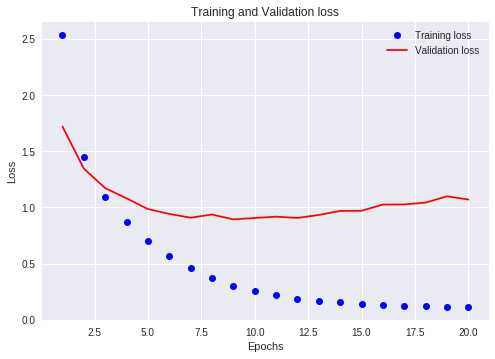

In [34]:
# 绘制训练损失和验证损失
# 监控模型是否过拟合了

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 分析

我们从训练集中抽出一部分来验证模型训练效果，算是训练过程里的自我监督。


从图中我们可以看到，大概在训练到10轮后，模型开始过拟合。所以我们可以选择在这个区间停止训练。



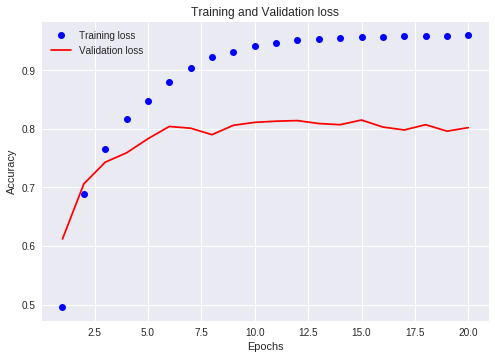

In [35]:
# 绘制训练精度和验证精度
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [36]:
# 现在我们重新训练一个模型，只训练到第10轮

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(partial_x_train,
          partial_y_train,
          epochs=10, 
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 178us/step - loss: 2.5393 - acc: 0.5226 - val_loss: 1.6724 - val_acc: 0.6580
Epoch 2/10
7982/7982 [==============================] - 1s 153us/step - loss: 1.3709 - acc: 0.7122 - val_loss: 1.2751 - val_acc: 0.7210
Epoch 3/10
7982/7982 [==============================] - 1s 155us/step - loss: 1.0147 - acc: 0.7785 - val_loss: 1.1318 - val_acc: 0.7500
Epoch 4/10
7982/7982 [==============================] - 1s 155us/step - loss: 0.7989 - acc: 0.8250 - val_loss: 1.0539 - val_acc: 0.7600
Epoch 5/10
7982/7982 [==============================] - 1s 154us/step - loss: 0.6402 - acc: 0.8626 - val_loss: 0.9765 - val_acc: 0.7930
Epoch 6/10
7982/7982 [==============================] - 1s 155us/step - loss: 0.5127 - acc: 0.8925 - val_loss: 0.9108 - val_acc: 0.8090
Epoch 7/10
7982/7982 [==============================] - 1s 155us/step - loss: 0.4126 - acc: 0.9147 - val_loss: 0.8912 - val_acc: 0.8210


In [37]:
results

[1.2128554795962407, 0.7782724844698171]

In [39]:
# 现在我们重新训练一个模型，只训练到第9轮

model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(partial_x_train,
          partial_y_train,
          epochs=9, 
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 190us/step - loss: 2.7782 - acc: 0.5021 - val_loss: 1.8350 - val_acc: 0.6200
Epoch 2/9
7982/7982 [==============================] - 1s 158us/step - loss: 1.4834 - acc: 0.6921 - val_loss: 1.3442 - val_acc: 0.7010
Epoch 3/9
7982/7982 [==============================] - 1s 157us/step - loss: 1.0787 - acc: 0.7725 - val_loss: 1.1510 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.8466 - acc: 0.8222 - val_loss: 1.0447 - val_acc: 0.7720
Epoch 5/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.6729 - acc: 0.8592 - val_loss: 0.9659 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 159us/step - loss: 0.5376 - acc: 0.8882 - val_loss: 0.9401 - val_acc: 0.8040
Epoch 7/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.4360 - acc: 0.9088 - val_loss: 0.8885 - val_acc: 0.8180
Epoch 8

In [40]:
results

[1.2128554795962407, 0.7782724844698171]

In [0]:
# 使用模型预测结果

predictions = model2.predict(x_test)

In [43]:
predictions[0].argmax()

3

In [44]:
predictions[0][3]

0.95172834

### 实验总结

中间层的维度要足够大，因为信息的传递如果在当前层丢失了，那么后面就再也看不见了。所以隐藏层要足够大，比如最后输出是46维，中间层的神经元个数不能小于46，否则成了信息瓶颈，信息被压缩到小于输出空间，导致最后无法得出正确的结论。

### 知识点总结

- 对于N类分类问题，网络的最后一层大小是N的Dense层
- 单标签多分类问题，网络的最后一层用softmax激活函数，输出N个类别的概率分布
- 多分类问题的损失函数几乎都用分类交叉熵
- 处理多分类问题标签的两种方法：
  - one-hot编码，使用categorical_crossentropy作为损失函数
  - 编码为整数张量，使用sparse_categorical_crossentropy损失函数